In [1]:
import os
import numpy as np
from plotly.subplots import make_subplots
from env.utils import load_all_scores, instance_fig
from vns_baselines import VNS_CVRP_KEYS

In [2]:
print("IRL_HGS1 scores:")
irl_hgs_1_df = load_all_scores("logs/dataset_train_data_cvrp_HGS_0.0", range(1, 4), VNS_CVRP_KEYS)
irl_hgs_1_best_score = irl_hgs_1_df.applymap(lambda x: min(x))
irl_hgs_1_overall = irl_hgs_1_best_score.apply(lambda x: [min(x), max(x), np.mean(x), np.std(x)])
irl_hgs_1_overall.index = ["Min", "Max", "Mean", "Std."]
irl_hgs_1_overall.T.round(2)

IRL_HGS1 scores:


,Min,Max,Mean,Std.
X-n101-k25.vrp,27591.0,27591.0,27591.00,0.00
X-n106-k14.vrp,26397.0,26416.0,26404.00,8.52
X-n110-k13.vrp,14971.0,14971.0,14971.00,0.00
X-n115-k10.vrp,12747.0,12747.0,12747.00,0.00
X-n120-k6.vrp,13332.0,13332.0,13332.00,0.00
...,...,...,...,...
X-n916-k207.vrp,331754.0,331949.0,331834.00,83.37
X-n936-k151.vrp,133279.0,133463.0,133379.00,75.96
X-n957-k87.vrp,85605.0,85760.0,85701.00,68.47
X-n979-k58.vrp,119927.0,120660.0,120305.33,299.71


In [3]:
print("IRL_HGS2 scores:")
irl_hgs_2_df = load_all_scores("logs/dataset_train_data_cvrp_HGS_0.1", range(1, 4), VNS_CVRP_KEYS)
irl_hgs_2_best_score = irl_hgs_2_df.applymap(lambda x: min(x))
irl_hgs_2_overall = irl_hgs_2_best_score.apply(lambda x: [min(x), max(x), np.mean(x), np.std(x)])
irl_hgs_2_overall.index = ["Min", "Max", "Mean", "Std."]
irl_hgs_2_overall.T.round(2)

IRL_HGS2 scores:


,Min,Max,Mean,Std.
X-n101-k25.vrp,27591.0,27591.0,27591.00,0.00
X-n106-k14.vrp,26375.0,26391.0,26384.67,6.94
X-n110-k13.vrp,14971.0,14971.0,14971.00,0.00
X-n115-k10.vrp,12747.0,12747.0,12747.00,0.00
X-n120-k6.vrp,13332.0,13332.0,13332.00,0.00
...,...,...,...,...
X-n916-k207.vrp,331691.0,332213.0,331936.00,214.30
X-n936-k151.vrp,133113.0,133476.0,133289.00,148.40
X-n957-k87.vrp,85757.0,85898.0,85840.00,60.22
X-n979-k58.vrp,119697.0,120620.0,120190.00,379.44


In [4]:
print("IRL_VNS1 scores:")
irl_vns_1_df = load_all_scores("logs/dataset_train_data_cvrp_HGS_0.0", range(1, 4), VNS_CVRP_KEYS)
irl_vns_1_best_score = irl_vns_1_df.applymap(lambda x: min(x))
irl_vns_1_overall = irl_vns_1_best_score.apply(lambda x: [min(x), max(x), np.mean(x), np.std(x)])
irl_vns_1_overall.index = ["Min", "Max", "Mean", "Std."]
irl_vns_1_overall.T.round(2)

IRL_VNS1 scores:


,Min,Max,Mean,Std.
X-n101-k25.vrp,27591.0,27591.0,27591.00,0.00
X-n106-k14.vrp,26397.0,26416.0,26404.00,8.52
X-n110-k13.vrp,14971.0,14971.0,14971.00,0.00
X-n115-k10.vrp,12747.0,12747.0,12747.00,0.00
X-n120-k6.vrp,13332.0,13332.0,13332.00,0.00
...,...,...,...,...
X-n916-k207.vrp,331754.0,331949.0,331834.00,83.37
X-n936-k151.vrp,133279.0,133463.0,133379.00,75.96
X-n957-k87.vrp,85605.0,85760.0,85701.00,68.47
X-n979-k58.vrp,119927.0,120660.0,120305.33,299.71


In [5]:
print("IRL_VNS2 scores:")
irl_vns_2_df = load_all_scores("logs/dataset_train_data_cvrp_HGS_0.1", range(1, 4), VNS_CVRP_KEYS)
irl_vns_2_best_score = irl_vns_2_df.applymap(lambda x: min(x))
irl_vns_2_overall = irl_vns_2_best_score.apply(lambda x: [min(x), max(x), np.mean(x), np.std(x)])
irl_vns_2_overall.index = ["Min", "Max", "Mean", "Std."]
irl_vns_2_overall.T.round(2)

IRL_VNS2 scores:


,Min,Max,Mean,Std.
X-n101-k25.vrp,27591.0,27591.0,27591.00,0.00
X-n106-k14.vrp,26375.0,26391.0,26384.67,6.94
X-n110-k13.vrp,14971.0,14971.0,14971.00,0.00
X-n115-k10.vrp,12747.0,12747.0,12747.00,0.00
X-n120-k6.vrp,13332.0,13332.0,13332.00,0.00
...,...,...,...,...
X-n916-k207.vrp,331691.0,332213.0,331936.00,214.30
X-n936-k151.vrp,133113.0,133476.0,133289.00,148.40
X-n957-k87.vrp,85757.0,85898.0,85840.00,60.22
X-n979-k58.vrp,119697.0,120620.0,120190.00,379.44


In [6]:
irl_hgs_1_running_time = irl_hgs_1_df.index.get_level_values("Running Time")[-1]/3600*3
irl_hgs_2_running_time = irl_hgs_2_df.index.get_level_values("Running Time")[-1]/3600*3
irl_vns_1_running_time = irl_vns_1_df.index.get_level_values("Running Time")[-1]/3600*3
irl_vns_2_running_time = irl_vns_2_df.index.get_level_values("Running Time")[-1]/3600*3

print(f"IRL_HGS1 running time = {irl_hgs_1_running_time:.2f}h")
print(f"IRL_HGS2 running time = {irl_hgs_2_running_time:.2f}h")
print(f"IRL_VNS1 running time = {irl_vns_1_running_time:.2f}h")
print(f"IRL_VNS2 running time = {irl_vns_2_running_time:.2f}h")

IRL_HGS1 running time = 20.13h
IRL_HGS2 running time = 34.66h
IRL_VNS1 running time = 20.13h
IRL_VNS2 running time = 34.66h


In [7]:
def show_graphs(algo, lamb, best_scores, keys):
    n = len(keys)
    width = 180*n
    fig = make_subplots(rows=1, cols=n, horizontal_spacing=0)
    os.makedirs(f"graphs/dataset_train_data_cvrp_{algo}_{lamb}", exist_ok=True)
    for i, key in enumerate(keys):
        plotly_fig, score = instance_fig(best_scores, key, "dataset/train/data_cvrp")
        plotly_fig.write_image(f"graphs/dataset_train_data_cvrp_{algo}_{lamb}/{key}.pdf")
        title = key.split(".")[0] + f" - {score:.1f}"
        fig.add_traces(plotly_fig.data, rows=i//n+1, cols=i%n+1)
        fig['layout'][f'xaxis{i+1}'].update(title=title)
    fig.update_layout(height=200, width=width)
    fig.update_traces(line_width=0.5, marker_size=1)
    fig.update_layout(template='plotly_white', margin=dict(l=0, r=0, t=0, b=0, pad=0, autoexpand=True))
    fig.update_xaxes(showgrid=False, showticklabels=False, showline=False, zeroline=False)
    fig.update_yaxes(visible=False)
    fig.update_layout(showlegend=False)
    fig.show("png")

First 10 instances:
IRL_HGS1


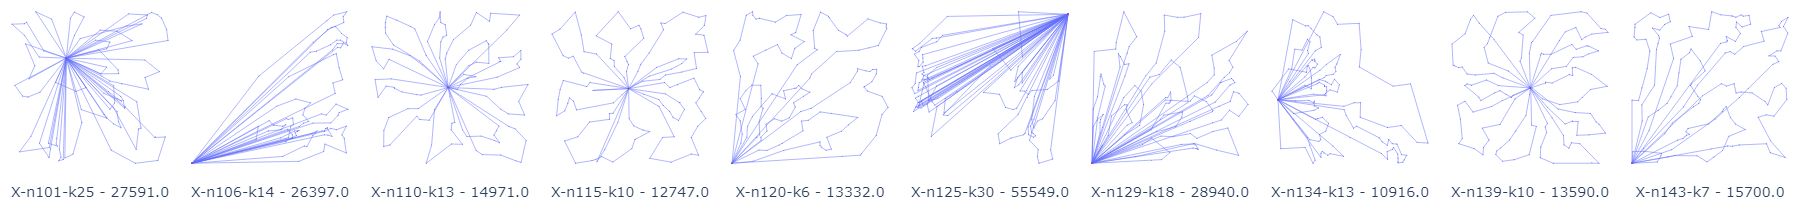

IRL_HGS2


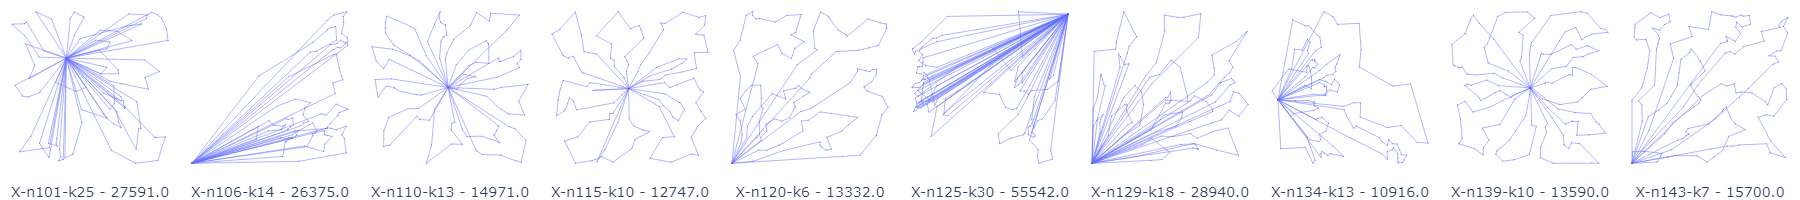

IRL_VNS1


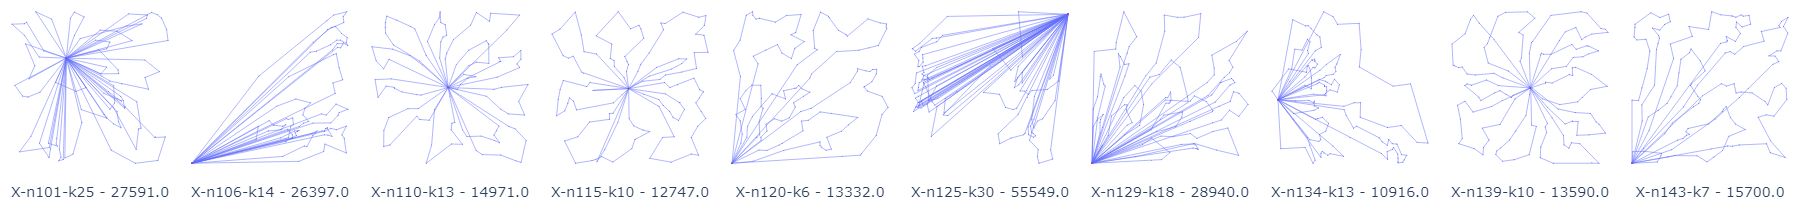

IRL_VNS2


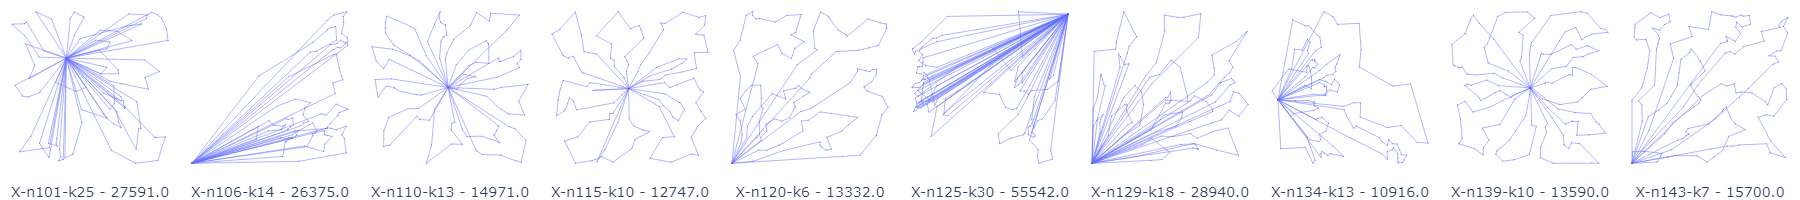

In [8]:
print("First 10 instances:")
print("IRL_HGS1")
show_graphs("HGS", 0.0, irl_hgs_1_best_score, VNS_CVRP_KEYS[:10])
print("IRL_HGS2")
show_graphs("HGS", 0.1, irl_hgs_2_best_score, VNS_CVRP_KEYS[:10])
print("IRL_VNS1")
show_graphs("VNS", 0.0, irl_vns_1_best_score, VNS_CVRP_KEYS[:10])
print("IRL_VNS2")
show_graphs("VNS", 0.1, irl_vns_2_best_score, VNS_CVRP_KEYS[:10])

Last 10 instances:
IRL_HGS1


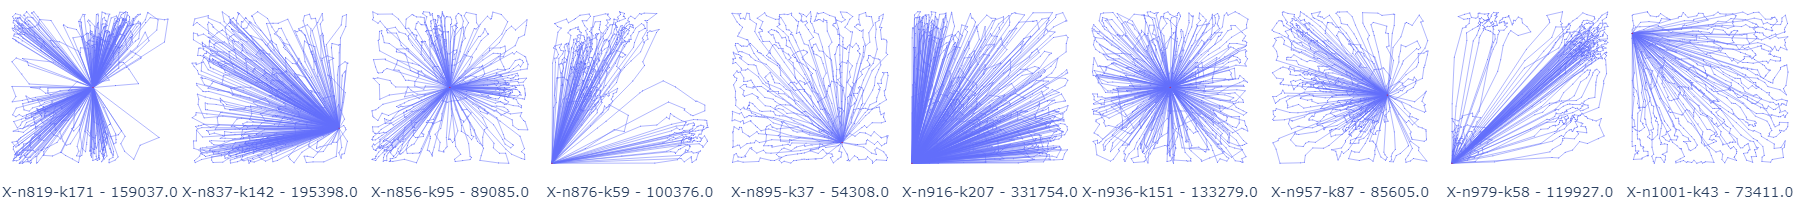

IRL_HGS2


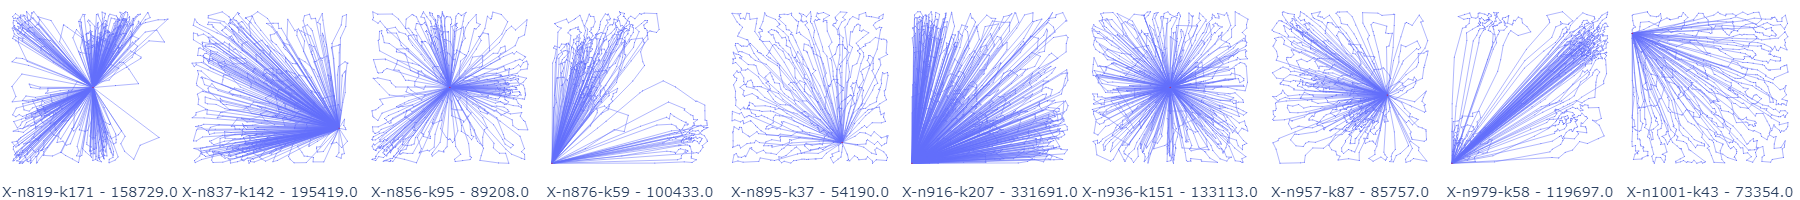

IRL_VNS1


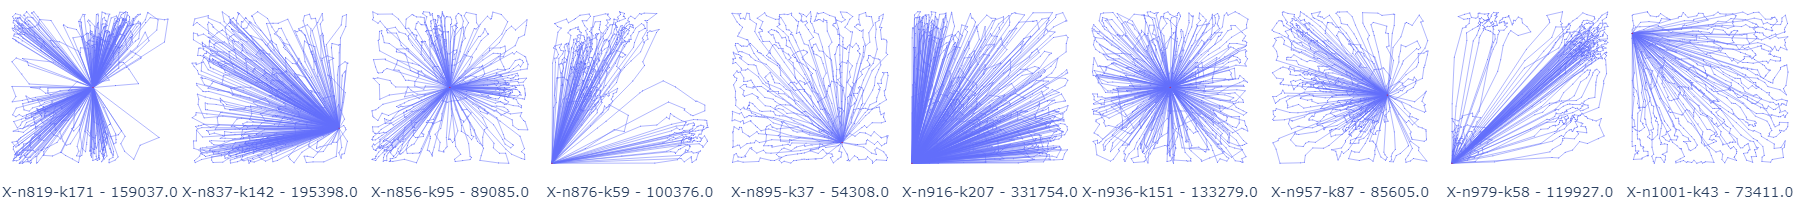

IRL_VNS2


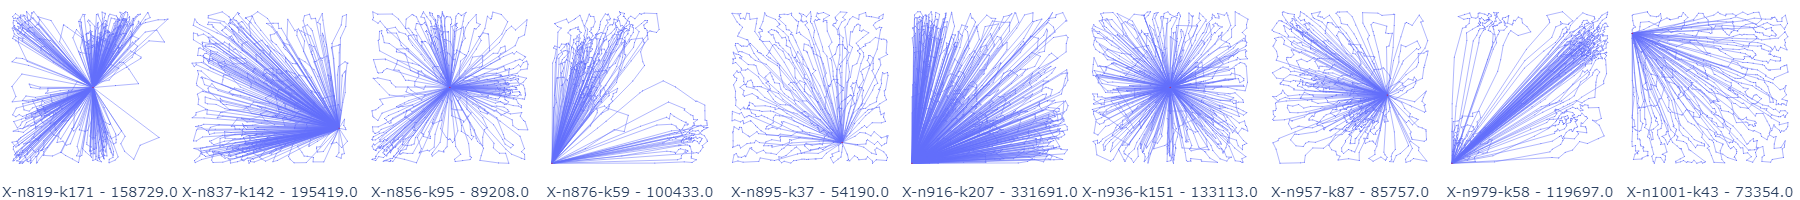

In [9]:
print("Last 10 instances:")
print("IRL_HGS1")
show_graphs("HGS", 0.0, irl_hgs_1_best_score, VNS_CVRP_KEYS[-10:])
print("IRL_HGS2")
show_graphs("HGS", 0.1, irl_hgs_2_best_score, VNS_CVRP_KEYS[-10:])
print("IRL_VNS1")
show_graphs("VNS", 0.0, irl_vns_1_best_score, VNS_CVRP_KEYS[-10:])
print("IRL_VNS2")
show_graphs("VNS", 0.1, irl_vns_2_best_score, VNS_CVRP_KEYS[-10:])